In [1]:
from matplotlib import cbook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
def get_demo_image():
    z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)

In [3]:
def demo_simple_grid(fig):
    """
    A grid of 2x2 images with 0.05 inch pad between images and only
    the lower-left axes is labeled.
    """
    grid = ImageGrid(
        fig, 141,  # similar to subplot(141)
        nrows_ncols=(2, 2), axes_pad=0.05, label_mode="1",
    )
    Z, extent = get_demo_image()
    for ax in grid:
        ax.imshow(Z, extent=extent)
    # This only affects axes in first column and second row as share_all=False.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])

In [4]:
def demo_grid_with_single_cbar(fig):
    """
    A grid of 2x2 images with a single colorbar
    """
    grid = ImageGrid(
        fig, 142,  # similar to subplot(142)
        nrows_ncols=(2, 2), axes_pad=0.0, share_all=True,
        label_mode="L", cbar_location="top", cbar_mode="single",
    )
    
    Z, extent = get_demo_image()
    for ax in grid:
        im = ax.imshow(Z, extent=extent)
    
    grid.cbar_axes[0].colorbar(im)
    
    for cax in grid.cbar_axes:
        cax.toggle_label(False)
    
    # This affects all axes as share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])

In [5]:
def demo_grid_with_each_cbar(fig):
    """
    A grid of 2x2 images. Each image has its own colorbar.
    """
    grid = ImageGrid(
        fig, 143,  # similar to subplot(143)
        nrows_ncols=(2, 2), axes_pad=0.1, label_mode="1", share_all=True,
        cbar_location="top", cbar_mode="each", cbar_size="7%", cbar_pad="2%",
    )
    Z, extent = get_demo_image()
    for ax, cax in zip(grid, grid.cbar_axes):
        im = ax.imshow(Z, extent=extent)
        cax.colorbar(im)
        cax.toggle_label(False)
    
    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])

In [6]:
def demo_grid_with_each_cbar_labelled(fig):
    """
    A grid of 2x2 images. Each image has its own colorbar.
    """
    grid = ImageGrid(
        fig, 144,  # similar to subplot(144)
        nrows_ncols=(2, 2), axes_pad=(0.45, 0.15), label_mode="1", share_all=True,
        cbar_location="right", cbar_mode="each", cbar_size="7%", cbar_pad="2%",
    )
    Z, extent = get_demo_image()
    
    # Use a different colorbar range every time
    limits = ((0, 1), (-2, 2), (-1.7, 1.4), (-1.5, 1))
    for ax, cax, vlim in zip(grid, grid.cbar_axes, limits):
        im = ax.imshow(Z, extent=extent, vmin=vlim[0], vmax=vlim[1])
        cb = cax.colorbar(im)
        cb.set_ticks((vlim[0], vlim[1]))
    
    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])

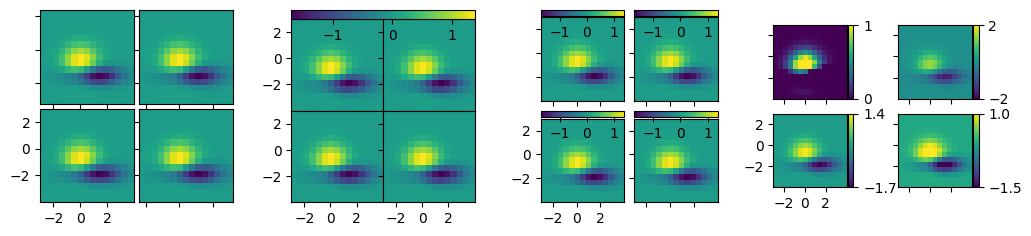

In [7]:
fig = plt.figure(figsize=(10.5, 2.5))
fig.subplots_adjust(left=0.05, right=0.95)

demo_simple_grid(fig)
demo_grid_with_single_cbar(fig)
demo_grid_with_each_cbar(fig)
demo_grid_with_each_cbar_labelled(fig)

plt.show()